<a href="https://colab.research.google.com/github/SALMA55ASHRAF/weight/blob/master/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries iwill work with
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.describe(include='O') # catgorical variables only

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.columns # names of columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.isnull().sum() # to know sum of all missing values in all columns

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.bmi.isnull().sum() # 201 missing value

201

In [11]:
#perctange of missing value=no of missing / no of all samples *100
p=(201/5110)*100
p

3.9334637964774952

about 4 % of data is null(missing)



1.  we see data distrubtion first and see is it symmatric or not
2.  then we must know best fill to it is it median or mean(symmtric)or drop or mode






<Axes: xlabel='bmi', ylabel='Count'>

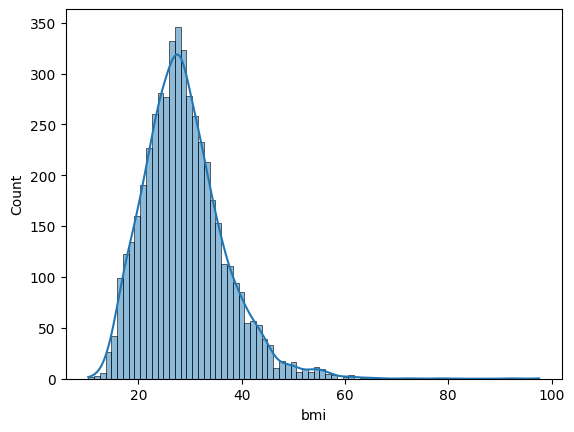

In [12]:
sns.histplot(data=df['bmi'],kde=True)

we see from graph its not mainly symmtric but we will fill it first with median and see the result

In [13]:
df['bmi'].median()

28.1

In [14]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: xlabel='stroke', ylabel='Count'>

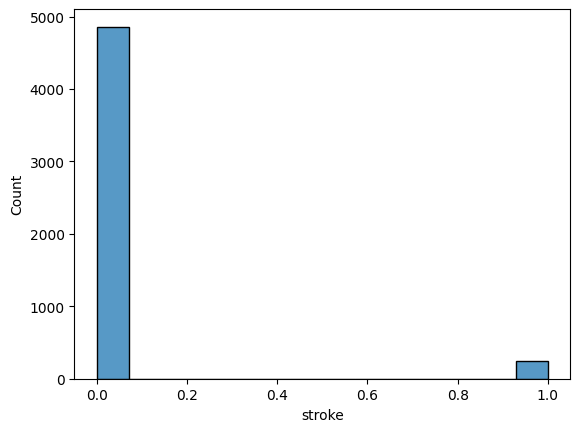

In [16]:
sns.histplot(df['stroke'])

we see here that the data is baised as the number of collected persons is more with no stroke than with stroke

In [17]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels =['Underweight', 'Ideal', 'Overweight', 'Obesity'])

<Axes: xlabel='age', ylabel='Count'>

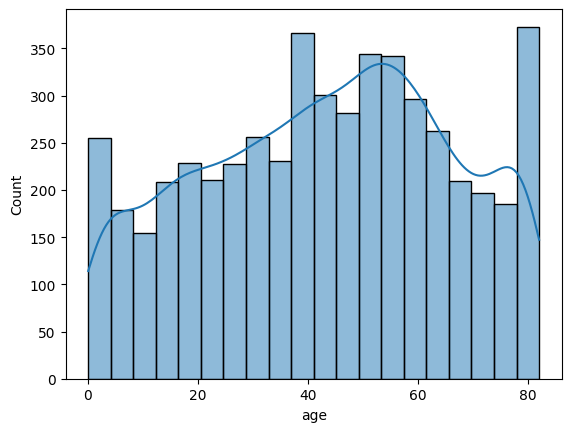

In [18]:
sns.histplot(df['age'],kde=True)

In [19]:
df['age_cat']=pd.cut(df['age'],bins=[0,12,25,50,60,100],labels=['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

In [20]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly


In [21]:
df['glucose_cat']=pd.cut(df['avg_glucose_level'],bins=[0,72,99,180,1000],labels=['low','noraml','high','very_high'])

In [22]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly,very_high


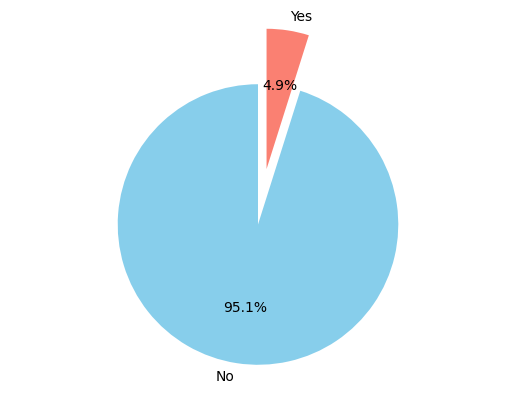

In [23]:
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode = (0.1, 0.3))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

here we see that our data is baised

<Axes: xlabel='age', ylabel='Count'>

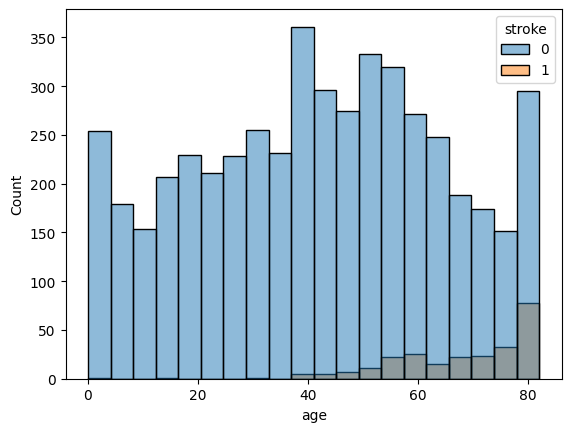

In [24]:
# TODO : visualise the age categories and the target
# Answering question related to what age categories is more likely to have a stroke?
sns.histplot(data=df,x='age',hue='stroke')

the elderly 🧓 catogrt tend to have more stroke (80 years and up)

<Axes: xlabel='gender', ylabel='stroke'>

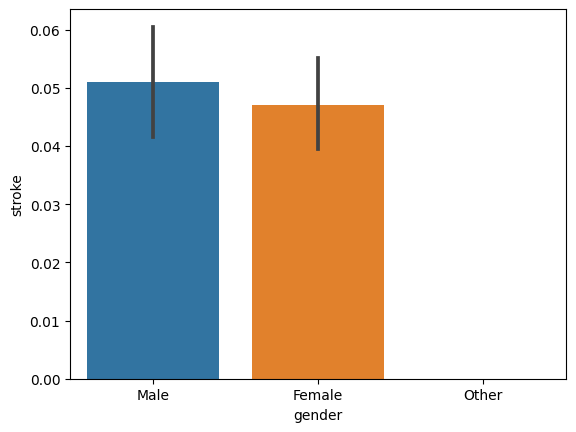

In [25]:
# TODO : visualise the gender and the target
import seaborn as sns
sns.barplot(x=df['gender'],y=df['stroke'])

<Axes: xlabel='gender', ylabel='Count'>

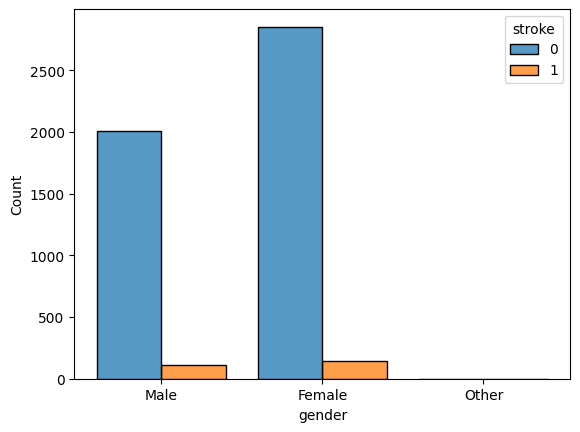

In [26]:
sns.histplot(data=df,x='gender',hue='stroke',shrink=.8,multiple="dodge")

female tend to have more stroke than men and tend to have no stroke than men

In [27]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

we have more female than male in our data which tend to alittle bias

<Axes: xlabel='hypertension', ylabel='Count'>

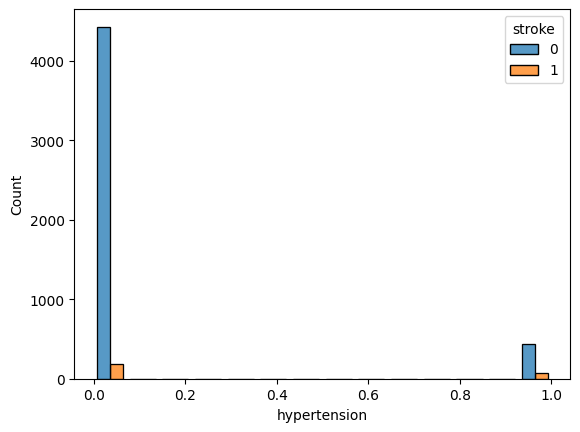

In [28]:
# TODO : visualise the hypertension and the target
sns.histplot(data=df,x='hypertension',hue='stroke',shrink=.8,multiple="dodge")

we see that people with hypertension have less stroke than people without

<Axes: xlabel='ever_married', ylabel='Count'>

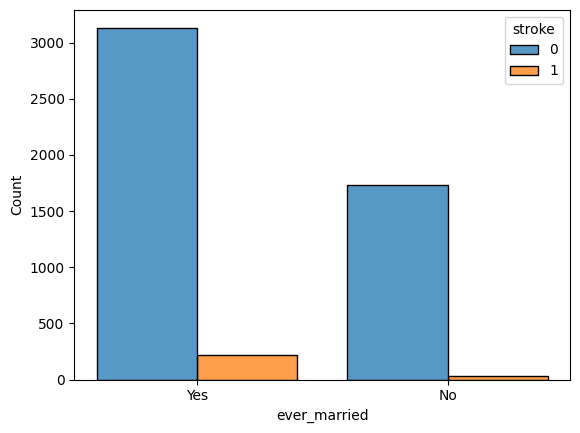

In [29]:
# TODO : visualise ever_married with the target
sns.histplot(data=df,x='ever_married',hue='stroke',shrink=.8,multiple="dodge")

In [30]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='glucose_cat', ylabel='Count'>

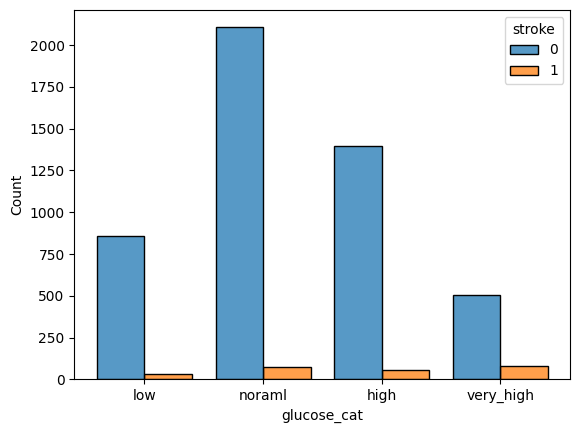

In [31]:
# TODO : visualise glucose_cat with the target
sns.histplot(data=df,x='glucose_cat',hue='stroke',shrink=.8,multiple="dodge")

in very high level of glucose the more person is going to have astroke

<Axes: xlabel='Residence_type', ylabel='Count'>

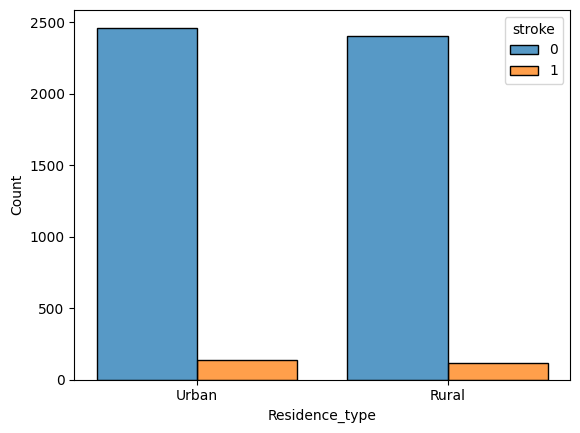

In [32]:
# TODO : Residence_type and the target
sns.histplot(data=df,x='Residence_type',hue='stroke',shrink=.8,multiple="dodge")

urban people tend to have more stroke than rural

In [33]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: xlabel='smoking_status', ylabel='Count'>

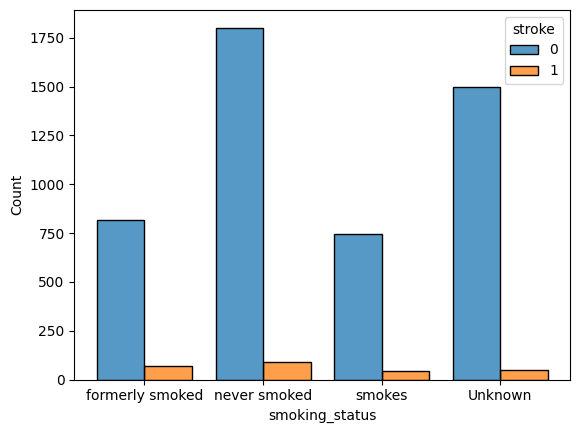

In [34]:
# TODO : smoking_status and the target
sns.histplot(data=df,x='smoking_status',hue='stroke',shrink=.8,multiple="dodge")

<ipython-input-35-9935002027f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-35-9935002027f2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

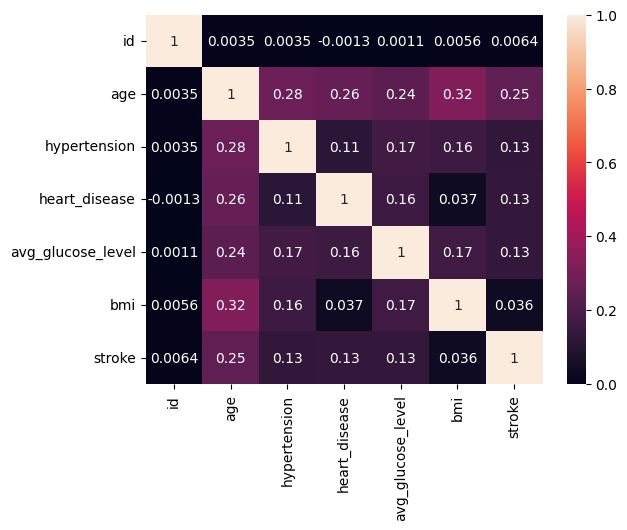

In [35]:
# TODO : build a Correlation Matrix and visualise it
# explain how the correlation matrix prove you point and the visualstion you made
df.corr()
sns.heatmap(df.corr(),annot=True)


<ipython-input-36-fcff3b155f0e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

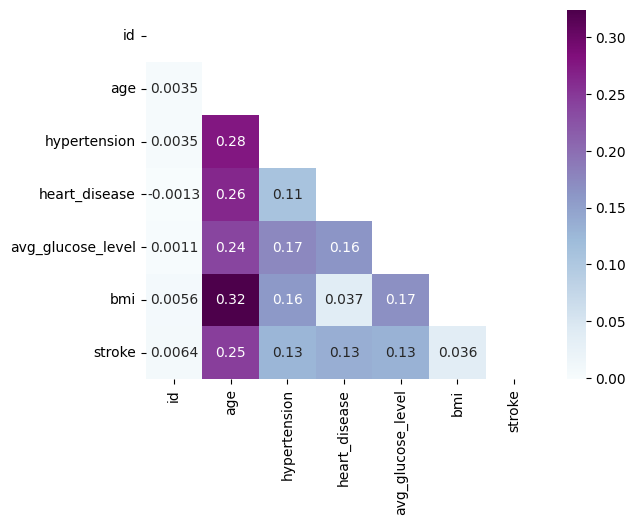

In [36]:
corr=df.corr()
matrix = np.triu(corr)#upper triangle
sns.heatmap(corr, annot=True, mask=matrix,cmap="BuPu")

we see that hypertension,heart_disease and avg_glucose_level have same effect on stroke
age have highest effect on stroke
id and bmi has the least effect on stroke

<Axes: xlabel='age_cat', ylabel='stroke'>

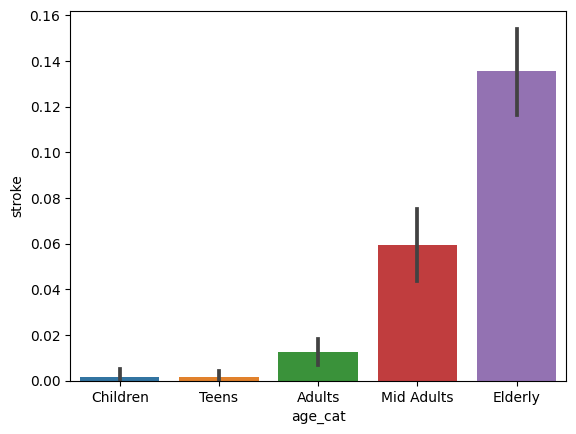

In [37]:
import seaborn as sns
sns.barplot(x=df['age_cat'],y=df['stroke'])

childern and teen have least stroke
elderly have the most

<Axes: xlabel='hypertension', ylabel='stroke'>

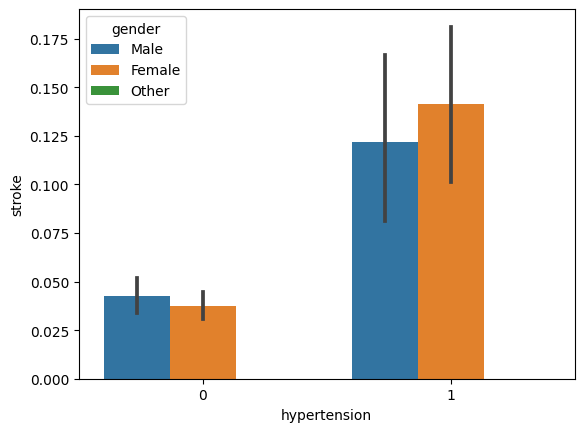

In [38]:
sns.barplot(x=df.hypertension,y=df.stroke,hue=df.gender)

<Axes: xlabel='hypertension', ylabel='stroke'>

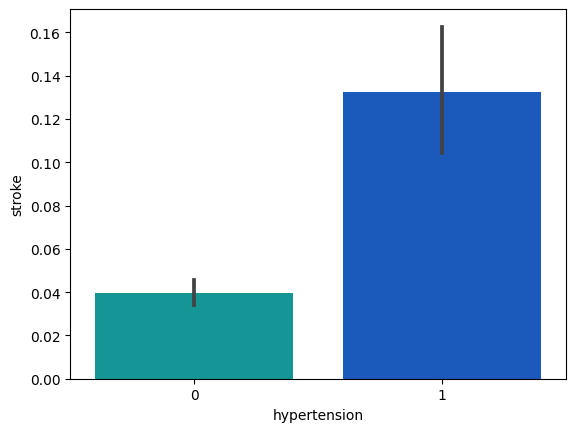

In [39]:
sns.barplot(x=df['hypertension'],y=df['stroke'],palette='winter_r')

<Axes: xlabel='stroke', ylabel='ever_married'>

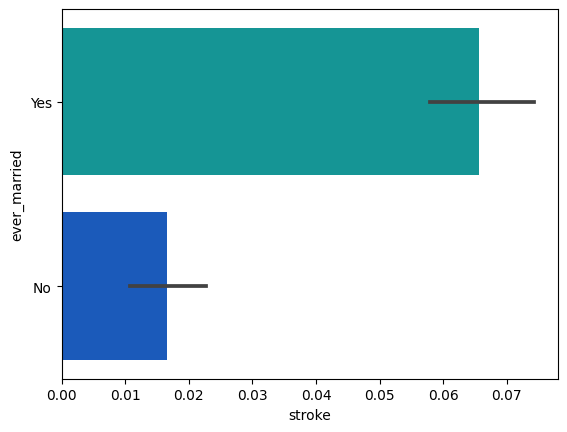

In [40]:
sns.barplot(x=df['stroke'],y=df['ever_married'],palette='winter_r')

<Axes: xlabel='stroke', ylabel='heart_disease'>

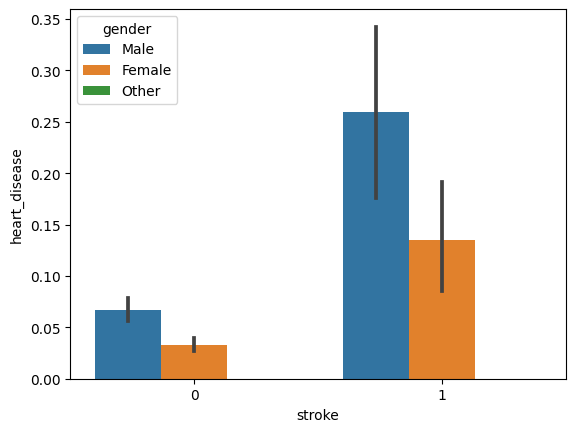

In [41]:
sns.barplot(x=df['stroke'],y=df['heart_disease'],hue=df['gender'])

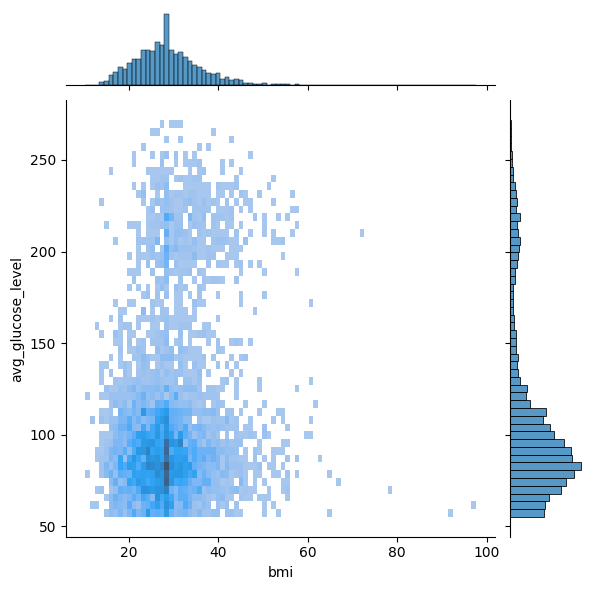

In [42]:
sns.jointplot(x=df['bmi'],y=df['avg_glucose_level'],kind='hist')

In [43]:
# example gender using sklearn
from sklearn.preprocessing import LabelEncoder
# Encode categorical features using scikit-learn LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['bmi_cat'] = encoder.fit_transform(df['bmi_cat'])
df['age_cat'] = encoder.fit_transform(df['age_cat'])
df['glucose_cat'] = encoder.fit_transform(df['glucose_cat'])

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [45]:
sdf = pd.DataFrame(scaled_data, columns = ['age', 'avg_glucose_level', 'bmi'])
sdf
bf = df
bf.loc[:, ['age', 'avg_glucose_level', 'bmi']] = sdf[['age', 'avg_glucose_level', 'bmi']]
bf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1,1,2,3
1,51676,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2,1,2,2,3
2,31112,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2,1,1,2,0
3,60182,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1,1,0,0
4,1665,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,1,2,1,-0.494658,-0.098981,2,0,2,2,2
5106,44873,0,1.670617,0,0,1,3,1,0.420775,1.446713,2,0,1,2,0
5107,19723,0,-0.363842,0,0,1,3,0,-0.511443,0.225745,2,0,1,0,2
5108,37544,1,0.343796,0,0,1,2,0,1.328257,-0.423706,1,0,2,3,0


In [46]:
import plotly.express as px
fig = px.parallel_coordinates(df.drop(columns=['bmi_cat','glucose_cat','age_cat']), color='stroke')
fig.show()

In [47]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [48]:
X = bf.drop(columns=['id','stroke'])
y = bf['stroke']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [50]:
smt=SMOTE()
X_train_resample,y_train_resample=smt.fit_resample(X_train,y_train)
print(X_train_resample.shape ,y_train_resample.shape)

(7770, 13) (7770,)


In [51]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resample, y_train_resample)

LogisticRegression()

In [52]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       976
           1       0.12      0.72      0.21        46

    accuracy                           0.76      1022
   macro avg       0.55      0.74      0.53      1022
weighted avg       0.94      0.76      0.83      1022



In [54]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.75636
